### Step 8: Exploratory data analysis through plotting

In [1]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [46]:
# open file effectpred.vcf
filename = "/Users/cmdb/qbb2020-answers/week2-hw/effectpred.vcf"
file = open(filename, 'r')

#initialize lists and dictionary
table = []; linesplit1 = []
formatcol = []; stringlist = []; readdepth = []
quality = []; annotation = []; allelefreq = []
predeffect = []; preddict = {}

for line in file:                                   # loop through lines in file
    
    if "#" in line:                                 # skip lines that start with ## or #
        continue
    
    linesplit1 = line.strip().split()               # split with whitespace
    for r in range(1, 11):                          # take last 10 elements for each sample
        string = linesplit1[-r] 
        if '.:.:.:.:.:.:.:.:.' in string:           # skip blanks
            continue
        formatcol.append(string)                    # save format for each sample in formatcol
    
    linesplit2 = line.strip().split(';')            # split based on ;
    for item in linesplit2:                         # look at each item in list with split by ;
        if 'SAF=' in item: 
            continue
        elif 'AF=' in item:                         # if AF is in the column 
            item = item.strip('AF=')                # strip AF
            if ',' in item:                         # multiple AF values will have ','
                afs = item.strip('AF=').split(',')  # split based on ','
                for af in afs:        
                    allelefreq.append(float(af))    # add each af value as float
            else: 
                item = item.strip(',')
                floatitem = float(item)
                allelefreq.append(floatitem)        # add item if not multiple
            
        if 'ERROR_CHROMOSOME_NOT_FOUND' in item:    # skip these lines
            continue
            
        elif 'ANN' in item:                         # if ANN in item than this is the snp effect column
            annotation = item.strip().split('|')    # split along |
            predeffect.append(annotation[1])        # append only the annotation (column 1) to list predeffect
            
for string in formatcol:                            # unpack strings from format column for each sample
    stringstrip = string.split(':')                 # split along ':'
    floatrd = float(stringstrip[2])                 # column 2 is the read depth
    floatq = float(stringstrip[1])                  # column 1 is the quality
    readdepth.append(floatrd)                        
    quality.append(floatq)

file.close()

for pred in predeffect:                             # loop through predicted effects (annotations)
    if pred not in preddict:                        # add to dictionary if not in there
        preddict[pred] = 1
    else:
        preddict[pred] += 1                         # count if already in there        
        
# SNPEFF 
##INFO=<ID=ANN,Number=.,Type=String,Description="Functional annotations: 'Allele | Annotation | 
##Annotation_Impact | Gene_Name | Gene_ID | Feature_Type | Feature_ID | 
##Transcript_BioType | Rank | HGVS.c | HGVS.p | cDNA.pos / cDNA.length | 
##CDS.pos / CDS.length | AA.pos / AA.length | Distance | ERRORS / WARNINGS/ INFO' ">

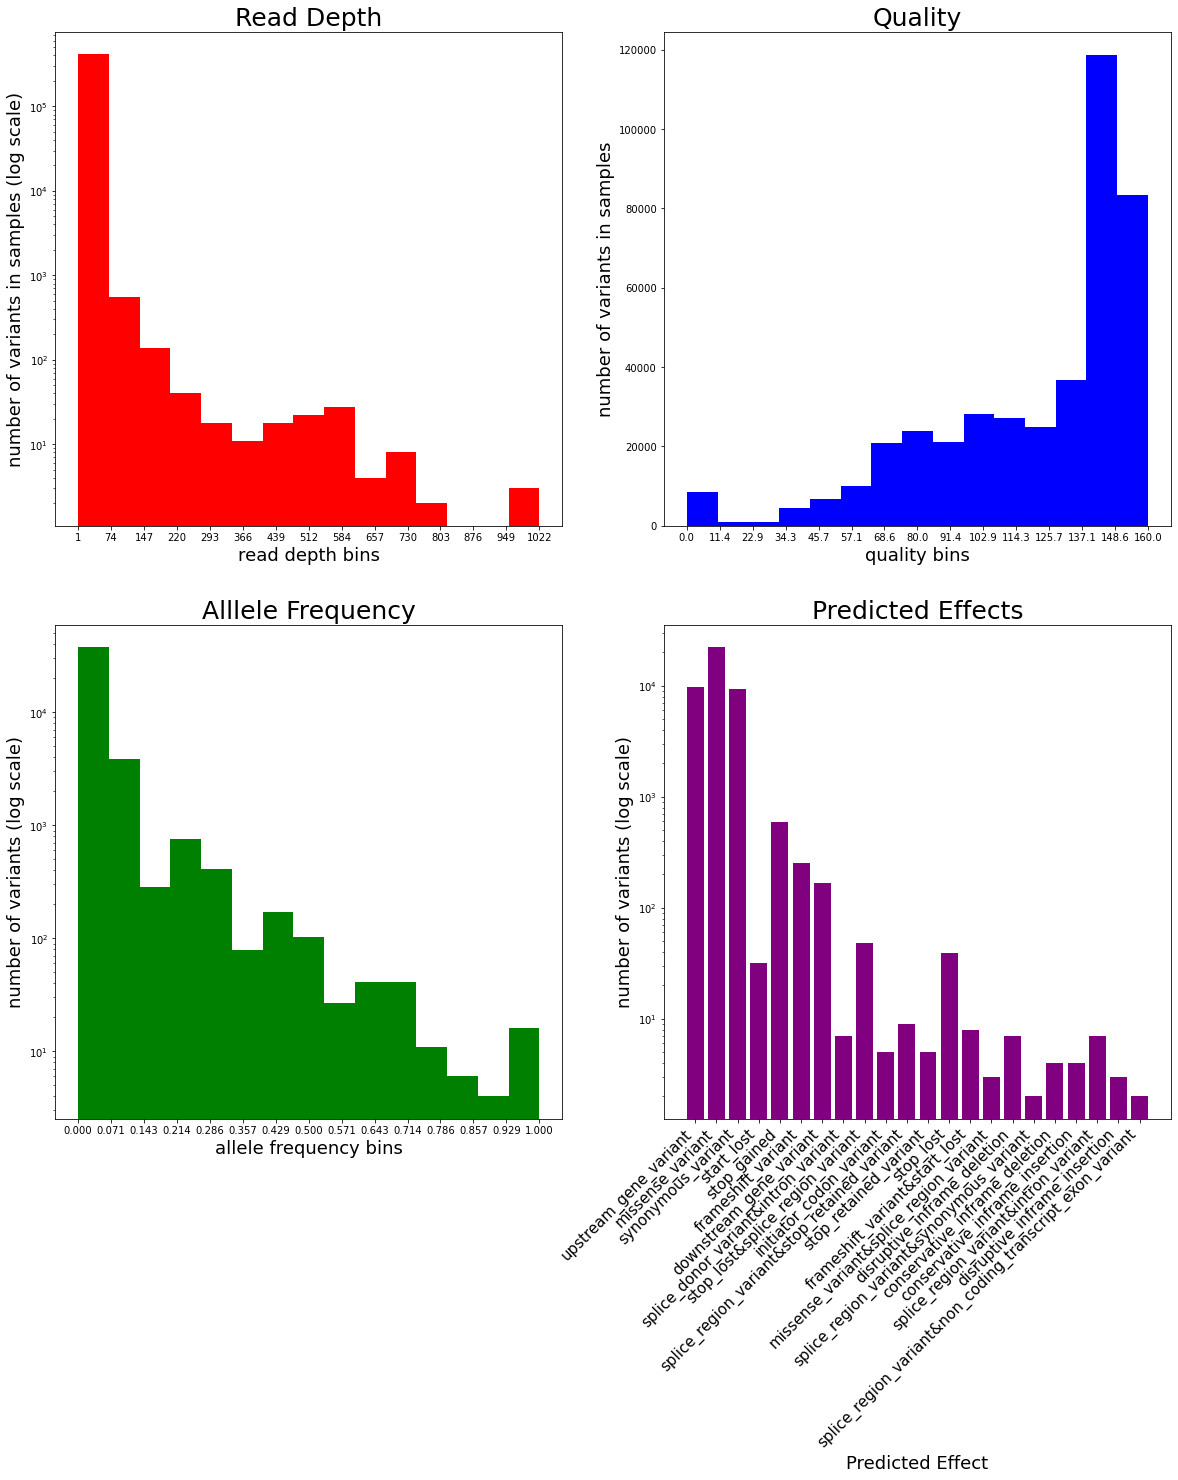

In [48]:
# create figure
fig = plt.figure(figsize = (20.0,20.0))

# set up axes and subplots
ax = fig.subplots(2,2)

# set bins
bin1 = 15
bin2 = 15
bin3 = 15

# plot histograms and bar graph
ax[0,0].hist(readdepth, bins = bin1, color = 'red') 
ax[0,1].hist(quality, bins = bin2, color = 'blue')
ax[1,0].hist(allelefreq, bins = bin3, color = 'green')
ax[1,1].bar(preddict.keys(), preddict.values(), color = 'purple')

# get data mins and maxs for the x tick labels
maxrd = float(max(readdepth))
minrd = float(min(readdepth))
maxq = float(max(quality))
minq = float(min(quality))
maxaf = float(max(allelefreq))
minaf = float(min(allelefreq))

# set up list of values for x tick labels
x1 = np.linspace(minrd, maxrd, bin1 )
x2 = np.linspace(minq, maxq, bin2)
x3 = np.linspace(minaf, maxaf, bin3)

# make xtick labels and scales for y (log)
ax[0,0].set_xticks(x1)
ax[0,0].set_yscale('log')
ax[0,1].set_xticks(x2)
ax[1,0].set_xticks(x3)
ax[1,0].set_yscale('log')
ax[1,1].set_xticks(range(0,22))
ax[1,1].set_yscale('log')
ax[1,1].set_xticklabels(preddict.keys(),rotation=45, ha = 'right', fontsize =15)

# label axes, title
ax[0,0].set_xlabel('read depth bins', fontsize=18)
ax[0,0].set_ylabel('number of variants in samples (log scale)', fontsize=18)
ax[0,0].set_title('Read Depth', fontsize=25)

ax[0,1].set_xlabel('quality bins', fontsize=18)
ax[0,1].set_ylabel('number of variants in samples', fontsize=18)
ax[0,1].set_title('Quality', fontsize=25)

ax[1,0].set_xlabel('allele frequency bins', fontsize=18)
ax[1,0].set_ylabel('number of variants (log scale)', fontsize=18)
ax[1,0].set_title('Alllele Frequency', fontsize=25)

ax[1,1].set_xlabel('Predicted Effect', fontsize=18)
ax[1,1].set_ylabel('number of variants (log scale)', fontsize=18)
ax[1,1].set_title('Predicted Effects', fontsize=25)

plt.show()